In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
# 2020년 1월부터 6월까지 데이터
df1 = pd.read_csv('data/한국전력공사_전기차충전소충전량(202001_202006).csv', encoding='cp949')

# 2020년 7월부터 12월까지 데이터
df2 = pd.read_csv('data/한국전력공사_전기차충전소충전량(202007_202012).csv', encoding='cp949')

# 두 데이터프레임을 병합
df = pd.concat([df1, df2], ignore_index=True)

# 병합된 데이터프레임 출력
print(df)

FileNotFoundError: [Errno 2] No such file or directory: 'data/한국전력공사_전기차충전소충전량(202001_202006).csv'

In [ ]:
df = df.drop('충전기ID', axis=1)
df

,본부,사업소,충전소명,충전기,주소,충전기구분,충전용량,충전량,충전시간,충전분,충전종료일자,충전시작시각,충전종료시각
0,서울,마포용산,용산역 아이파크몰,급속04,"서울특별시 용산구 한강대로23길 55 (한강로3가, 용산역)",급속,50.0,22.31,0,34,2020-01-01,2020-01-01 21:33:00,2020-01-01 22:07:00
1,경기,경기직할,영통공영주차장,급속02,경기도 수원시 영통구 봉영로 1598,급속,50.0,32.85,1,31,2020-01-01,2020-01-01 20:40:00,2020-01-01 22:11:00
2,광주전남,서광주,효천2지구 중흥S클래스,급속01,"광주광역시 남구 효우로 332-11 (행암동, 효천2지구 중흥S-클래스 아파트)",급속,50.0,17.65,0,31,2020-01-01,2020-01-01 21:39:00,2020-01-01 22:11:00
3,경기북부,경기북부직할,양주자이2단지 아파트,완속02,경기도 양주시 삼숭동 삼숭로38번길 78-12,완속,7.0,8.50,2,41,2020-01-01,2020-01-01 20:05:00,2020-01-01 22:46:00
4,인천,남인천,서창LH6단지,완속01,인천광역시 남동구 서창남순환로 190-100,완속,7.0,12.70,2,51,2020-01-01,2020-01-01 16:17:00,2020-01-01 19:09:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2056633,경기,서수원,동탄신일유토빌,완속03,경기도 화성시 동탄반석로 232,완속,7.0,18.96,6,10,2020-12-03,2020-12-02 23:04,2020-12-03 5:14
2056634,인천,서인천,청라롯데캐슬 아파트,완속03,인천광역시 서구 청라커낼로 252,완속,7.0,37.80,5,44,2020-12-03,2020-12-02 23:31,2020-12-03 5:16
2056635,남서울,강남,타워팰리스G동,완속02,서울특별시 강남구 도곡동 언주로30길 26,완속,7.0,52.16,9,37,2020-12-03,2020-12-02 19:40,2020-12-03 5:17
2056636,대구,남대구,상인역e편한세상2단지 아파트,완속01,대구광역시 달서구 상인동 월서로3길 15,완속,7.0,39.77,6,22,2020-12-03,2020-12-02 23:02,2020-12-03 5:25


In [ ]:
df[['시', '구', '도로명주소']] = df['주소'].str.split(' ', n=2, expand=True)
df.head(3)

,본부,사업소,충전소명,충전기,주소,충전기구분,충전용량,충전량,충전시간,충전분,충전종료일자,충전시작시각,충전종료시각,시,구,도로명주소
0,서울,마포용산,용산역 아이파크몰,급속04,"서울특별시 용산구 한강대로23길 55 (한강로3가, 용산역)",급속,50.0,22.31,0,34,2020-01-01,2020-01-01 21:33:00,2020-01-01 22:07:00,서울특별시,용산구,"한강대로23길 55 (한강로3가, 용산역)"
1,경기,경기직할,영통공영주차장,급속02,경기도 수원시 영통구 봉영로 1598,급속,50.0,32.85,1,31,2020-01-01,2020-01-01 20:40:00,2020-01-01 22:11:00,경기도,수원시,영통구 봉영로 1598
2,광주전남,서광주,효천2지구 중흥S클래스,급속01,"광주광역시 남구 효우로 332-11 (행암동, 효천2지구 중흥S-클래스 아파트)",급속,50.0,17.65,0,31,2020-01-01,2020-01-01 21:39:00,2020-01-01 22:11:00,광주광역시,남구,"효우로 332-11 (행암동, 효천2지구 중흥S-클래스 아파트)"


In [ ]:
gwangju = df[df['시'] == '광주광역시']
gwangju

,본부,사업소,충전소명,충전기,주소,충전기구분,충전용량,충전량,충전시간,충전분,충전종료일자,충전시작시각,충전종료시각,시,구,도로명주소
2,광주전남,서광주,효천2지구 중흥S클래스,급속01,"광주광역시 남구 효우로 332-11 (행암동, 효천2지구 중흥S-클래스 아파트)",급속,50.0,17.65,0,31,2020-01-01,2020-01-01 21:39:00,2020-01-01 22:11:00,광주광역시,남구,"효우로 332-11 (행암동, 효천2지구 중흥S-클래스 아파트)"
38,광주전남,광산,선운이지더원1단지,완속01,"광주광역시 광산구 선운로20번길 47 (선암동, 광주 선운지구 EG the1 1단지)",완속,7.0,26.83,4,31,2020-01-01,2020-01-01 18:12:00,2020-01-01 22:43:00,광주광역시,광산구,"선운로20번길 47 (선암동, 광주 선운지구 EG the1 1단지)"
41,광주전남,광산,하남2지구 중흥S-클래스,완속02,"광주광역시 광산구 목련로21번길 20 (산정동, 하남2지구 중흥S-클래스)",완속,7.0,11.91,1,56,2020-01-01,2020-01-01 21:08:00,2020-01-01 23:05:00,광주광역시,광산구,"목련로21번길 20 (산정동, 하남2지구 중흥S-클래스)"
58,광주전남,광주전남직할,월남 호반베르디움2차,완속01,"광주광역시 동구 남문로 307 (월남동, 월남호반베르디움 2차)",완속,7.0,11.76,3,54,2020-01-01,2020-01-01 20:00:00,2020-01-01 23:54:00,광주광역시,동구,"남문로 307 (월남동, 월남호반베르디움 2차)"
100,광주전남,광산,수완대방노블랜드3차아파트,완속02,"광주광역시 광산구 풍영로170번길 39-10 (장덕동, 성덕마을 대방노블랜드3차)",완속,7.0,12.33,4,9,2020-01-01,2020-01-01 18:13:00,2020-01-01 22:23:00,광주광역시,광산구,"풍영로170번길 39-10 (장덕동, 성덕마을 대방노블랜드3차)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2056457,광주전남,서광주,상무버들1단지,완속01,"광주광역시 서구 상무버들로40번길 14 (유촌동, 상무버들마을1주공아파트)",완속,7.0,49.80,8,0,2020-12-03,2020-12-02 18:41,2020-12-03 2:42,광주광역시,서구,"상무버들로40번길 14 (유촌동, 상무버들마을1주공아파트)"
2056471,광주전남,서광주,광천e편한세상아파트,급속01,"광주광역시 서구 화운로 278 (광천동, 광천 e편한세상)",급속,50.0,40.96,9,39,2020-12-03,2020-12-02 23:09,2020-12-03 8:49,광주광역시,서구,"화운로 278 (광천동, 광천 e편한세상)"
2056507,광주전남,광주전남직할,무등파크맨션3차,완속01,"광주광역시 동구 의재로 123 (운림동, 무등파크맨션)",완속,7.0,25.19,4,26,2020-12-03,2020-12-02 23:50,2020-12-03 4:16,광주광역시,동구,"의재로 123 (운림동, 무등파크맨션)"
2056551,광주전남,광산,우산국제미소래아파트,완속01,"광주광역시 광산구 용아로 175 (우산동, 국제미소래아파트)",완속,7.0,49.19,7,47,2020-12-03,2020-12-02 21:05,2020-12-03 4:52,광주광역시,광산구,"용아로 175 (우산동, 국제미소래아파트)"


In [ ]:
gwangju = gwangju.drop_duplicates().reset_index(drop=True)
gwangju

,본부,사업소,충전소명,충전기,주소,충전기구분,충전용량,충전량,충전시간,충전분,충전종료일자,충전시작시각,충전종료시각,시,구,도로명주소
0,광주전남,서광주,효천2지구 중흥S클래스,급속01,"광주광역시 남구 효우로 332-11 (행암동, 효천2지구 중흥S-클래스 아파트)",급속,50.0,17.65,0,31,2020-01-01,2020-01-01 21:39:00,2020-01-01 22:11:00,광주광역시,남구,"효우로 332-11 (행암동, 효천2지구 중흥S-클래스 아파트)"
1,광주전남,광산,선운이지더원1단지,완속01,"광주광역시 광산구 선운로20번길 47 (선암동, 광주 선운지구 EG the1 1단지)",완속,7.0,26.83,4,31,2020-01-01,2020-01-01 18:12:00,2020-01-01 22:43:00,광주광역시,광산구,"선운로20번길 47 (선암동, 광주 선운지구 EG the1 1단지)"
2,광주전남,광산,하남2지구 중흥S-클래스,완속02,"광주광역시 광산구 목련로21번길 20 (산정동, 하남2지구 중흥S-클래스)",완속,7.0,11.91,1,56,2020-01-01,2020-01-01 21:08:00,2020-01-01 23:05:00,광주광역시,광산구,"목련로21번길 20 (산정동, 하남2지구 중흥S-클래스)"
3,광주전남,광주전남직할,월남 호반베르디움2차,완속01,"광주광역시 동구 남문로 307 (월남동, 월남호반베르디움 2차)",완속,7.0,11.76,3,54,2020-01-01,2020-01-01 20:00:00,2020-01-01 23:54:00,광주광역시,동구,"남문로 307 (월남동, 월남호반베르디움 2차)"
4,광주전남,광산,수완대방노블랜드3차아파트,완속02,"광주광역시 광산구 풍영로170번길 39-10 (장덕동, 성덕마을 대방노블랜드3차)",완속,7.0,12.33,4,9,2020-01-01,2020-01-01 18:13:00,2020-01-01 22:23:00,광주광역시,광산구,"풍영로170번길 39-10 (장덕동, 성덕마을 대방노블랜드3차)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57267,광주전남,서광주,상무버들1단지,완속01,"광주광역시 서구 상무버들로40번길 14 (유촌동, 상무버들마을1주공아파트)",완속,7.0,49.80,8,0,2020-12-03,2020-12-02 18:41,2020-12-03 2:42,광주광역시,서구,"상무버들로40번길 14 (유촌동, 상무버들마을1주공아파트)"
57268,광주전남,서광주,광천e편한세상아파트,급속01,"광주광역시 서구 화운로 278 (광천동, 광천 e편한세상)",급속,50.0,40.96,9,39,2020-12-03,2020-12-02 23:09,2020-12-03 8:49,광주광역시,서구,"화운로 278 (광천동, 광천 e편한세상)"
57269,광주전남,광주전남직할,무등파크맨션3차,완속01,"광주광역시 동구 의재로 123 (운림동, 무등파크맨션)",완속,7.0,25.19,4,26,2020-12-03,2020-12-02 23:50,2020-12-03 4:16,광주광역시,동구,"의재로 123 (운림동, 무등파크맨션)"
57270,광주전남,광산,우산국제미소래아파트,완속01,"광주광역시 광산구 용아로 175 (우산동, 국제미소래아파트)",완속,7.0,49.19,7,47,2020-12-03,2020-12-02 21:05,2020-12-03 4:52,광주광역시,광산구,"용아로 175 (우산동, 국제미소래아파트)"


In [ ]:
# gwangju.to_excel('1월에서12월.xlsx')

In [ ]:
gwangju.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57272 entries, 0 to 57271
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   본부      57272 non-null  object 
 1   사업소     57272 non-null  object 
 2   충전소명    57272 non-null  object 
 3   충전기     57272 non-null  object 
 4   주소      57272 non-null  object 
 5   충전기구분   57272 non-null  object 
 6   충전용량    56808 non-null  float64
 7   충전량     57272 non-null  float64
 8   충전시간    57272 non-null  int64  
 9   충전분     57272 non-null  int64  
 10  충전종료일자  57272 non-null  object 
 11  충전시작시각  57272 non-null  object 
 12  충전종료시각  57272 non-null  object 
 13  시       57272 non-null  object 
 14  구       57272 non-null  object 
 15  도로명주소   57272 non-null  object 
dtypes: float64(2), int64(2), object(12)
memory usage: 7.0+ MB


<AxesSubplot:xlabel='구', ylabel='충전량'>

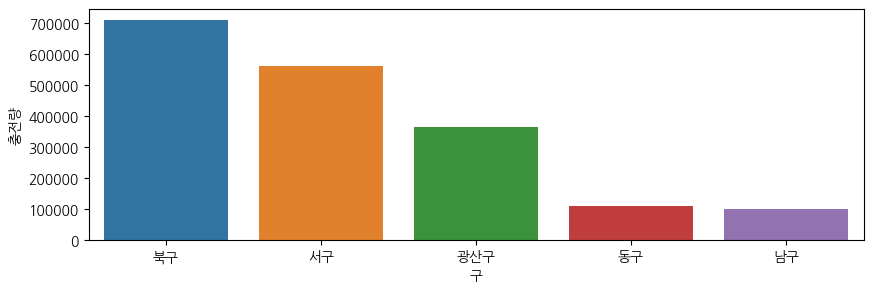

In [ ]:
# 구별 충전량
gwangju_gu = gwangju.groupby('구')['충전량'].sum().sort_values(ascending=False)
gwangju_gu = gwangju_gu.reset_index()
gwangju_gu
plt.figure(figsize=(10,3))
sns.barplot(data=gwangju_gu,x='구',y='충전량')

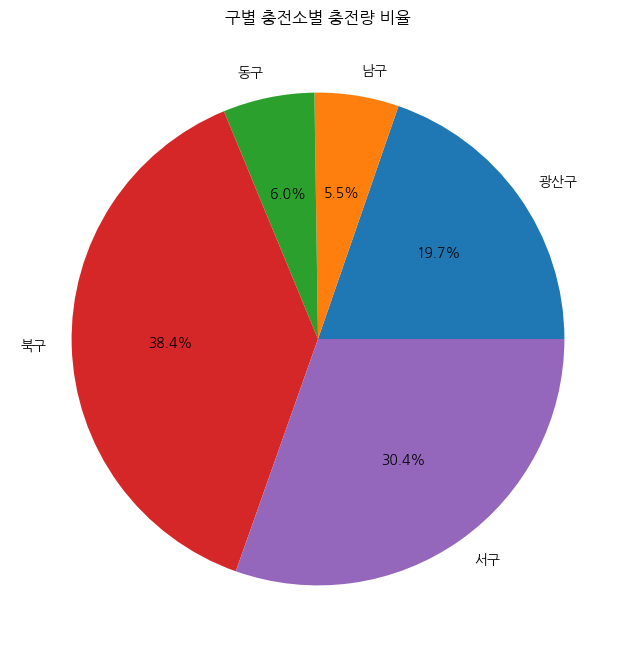

In [ ]:
# 구별 충전량 비율
df_charge = gwangju[['구', '충전량']]
df_charge_sum = df_charge.groupby('구').sum()

df_charge_sum.plot(kind='pie', y='충전량', legend=False, autopct='%1.1f%%', figsize=(8,8))
plt.title('구별 충전소별 충전량 비율')
plt.ylabel('')
plt.show()

In [ ]:
# gwangju202001 = gwangju[gwangju['충전종료일자'] == '2020-01-01']
# gwangju202002 = gwangju[gwangju['충전종료일자'] == '2020-01-02']
# gwangju202003 = gwangju[gwangju['충전종료일자'] == '2020-01-03']
# gwangju202004 = gwangju[gwangju['충전종료일자'] == '2020-01-04']
# gwangju202005 = gwangju[gwangju['충전종료일자'] == '2020-01-05']
# gwangju202006 = gwangju[gwangju['충전종료일자'] == '2020-01-06']

In [ ]:
# 시간별 구별 총충전량
gwangju['충전시작시각'] = pd.to_datetime(gwangju['충전시작시각'])

# 시간별, 구별 충전량 계산
hourcharge = gwangju.groupby([gwangju['충전시작시각'].dt.hour, gwangju['구']])['충전량'].sum()

hourcharge_df = pd.DataFrame({'시간': [i[0] for i in hourcharge.index],
                                       '구': [i[1] for i in hourcharge.index],
                                       '충전량': hourcharge.values})
hourcharge_df

,시간,구,충전량
0,0,광산구,7200.154
1,0,남구,2622.400
2,0,동구,1289.810
3,0,북구,4389.490
4,0,서구,2741.128
...,...,...,...
115,23,광산구,14803.102
116,23,남구,9600.440
117,23,동구,2405.900
118,23,북구,25760.390


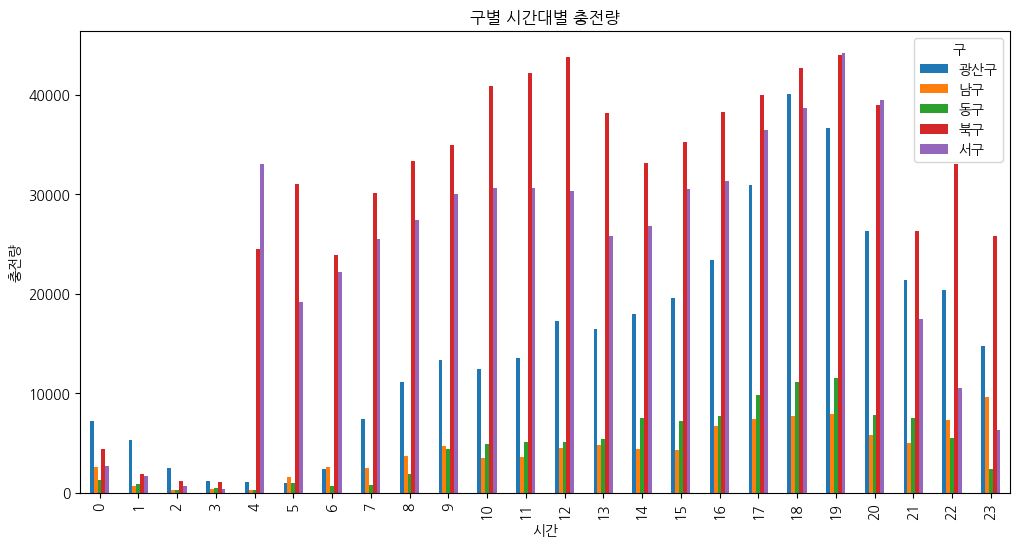

In [ ]:
mart_hourly_pivot = hourcharge_df.pivot_table(values='충전량', index='시간', columns='구', aggfunc='sum')

mart_hourly_pivot.plot(kind='bar', figsize=(12,6))
plt.xlabel('시간')
plt.ylabel('충전량')
plt.title('구별 시간대별 충전량')
plt.show()

In [ ]:
# 구별충전량
gu_charge = gwangju.groupby([gwangju['충전종료일자'], gwangju['구']])['충전량'].sum()
gu_charge

충전종료일자      구  
2020-01-01  광산구    1475.1540
            남구      412.2700
            동구      503.6600
            북구     1851.5300
            서구     2097.3620
                     ...    
2020-12-03  광산구    1091.0700
            남구      272.0900
            동구      396.3400
            북구     6580.9999
            서구     1923.7700
Name: 충전량, Length: 1680, dtype: float64

In [ ]:
# 충전시간별 충전소명 충전량
gu_charge_df = pd.DataFrame({'충전종료일자': [i[0] for i in gu_charge.index],
                                       '구': [i[1] for i in gu_charge.index],
                                       '충전량': gu_charge.values})
gu_charge_df

,충전종료일자,구,충전량
0,2020-01-01,광산구,1475.1540
1,2020-01-01,남구,412.2700
2,2020-01-01,동구,503.6600
3,2020-01-01,북구,1851.5300
4,2020-01-01,서구,2097.3620
...,...,...,...
1675,2020-12-03,광산구,1091.0700
1676,2020-12-03,남구,272.0900
1677,2020-12-03,동구,396.3400
1678,2020-12-03,북구,6580.9999


In [ ]:
gu_charge_df['충전종료일자'] = pd.to_datetime(gu_charge_df['충전종료일자'])
# '월' column 추가
gu_charge_df['월'] = gu_charge_df['충전종료일자'].dt.month

# 월별로 데이터프레임 분할
gu_charge_by_month = [gu_charge_df.loc[gu_charge_df['월'] == i] for i in range(1, 13)]
gu_charge_by_month

[        충전종료일자    구       충전량  월
 0   2020-01-01  광산구  1475.154  1
 1   2020-01-01   남구   412.270  1
 2   2020-01-01   동구   503.660  1
 3   2020-01-01   북구  1851.530  1
 4   2020-01-01   서구  2097.362  1
 ..         ...  ...       ... ..
 150 2020-01-31  광산구  1053.260  1
 151 2020-01-31   남구   426.720  1
 152 2020-01-31   동구   216.570  1
 153 2020-01-31   북구  1879.750  1
 154 2020-01-31   서구  1425.060  1
 
 [155 rows x 4 columns],
         충전종료일자    구       충전량  월
 155 2020-02-01  광산구   888.886  2
 156 2020-02-01   남구   391.030  2
 157 2020-02-01   동구   199.320  2
 158 2020-02-01   북구  1505.760  2
 159 2020-02-01   서구  1605.830  2
 ..         ...  ...       ... ..
 295 2020-02-29  광산구   851.978  2
 296 2020-02-29   남구   363.160  2
 297 2020-02-29   동구   175.940  2
 298 2020-02-29   북구  1550.320  2
 299 2020-02-29   서구  1461.578  2
 
 [145 rows x 4 columns],
         충전종료일자    구       충전량  월
 300 2020-03-01  광산구   525.684  3
 301 2020-03-01   남구   204.360  3
 302 2020-03-01   동구   311.8

In [ ]:
gu1_charge_df = gu_charge_by_month[0]
gu2_charge_df = gu_charge_by_month[1]
gu3_charge_df = gu_charge_by_month[2]
gu4_charge_df = gu_charge_by_month[3]
gu5_charge_df = gu_charge_by_month[4]
gu6_charge_df = gu_charge_by_month[5]
gu7_charge_df = gu_charge_by_month[6]
gu8_charge_df = gu_charge_by_month[7]
gu9_charge_df = gu_charge_by_month[8]
gu10_charge_df = gu_charge_by_month[9]
gu11_charge_df = gu_charge_by_month[10]
gu12_charge_df = gu_charge_by_month[11]
gu1_charge_df

,충전종료일자,구,충전량,월
0,2020-01-01,광산구,1475.154,1
1,2020-01-01,남구,412.270,1
2,2020-01-01,동구,503.660,1
3,2020-01-01,북구,1851.530,1
4,2020-01-01,서구,2097.362,1
...,...,...,...,...
150,2020-01-31,광산구,1053.260,1
151,2020-01-31,남구,426.720,1
152,2020-01-31,동구,216.570,1
153,2020-01-31,북구,1879.750,1


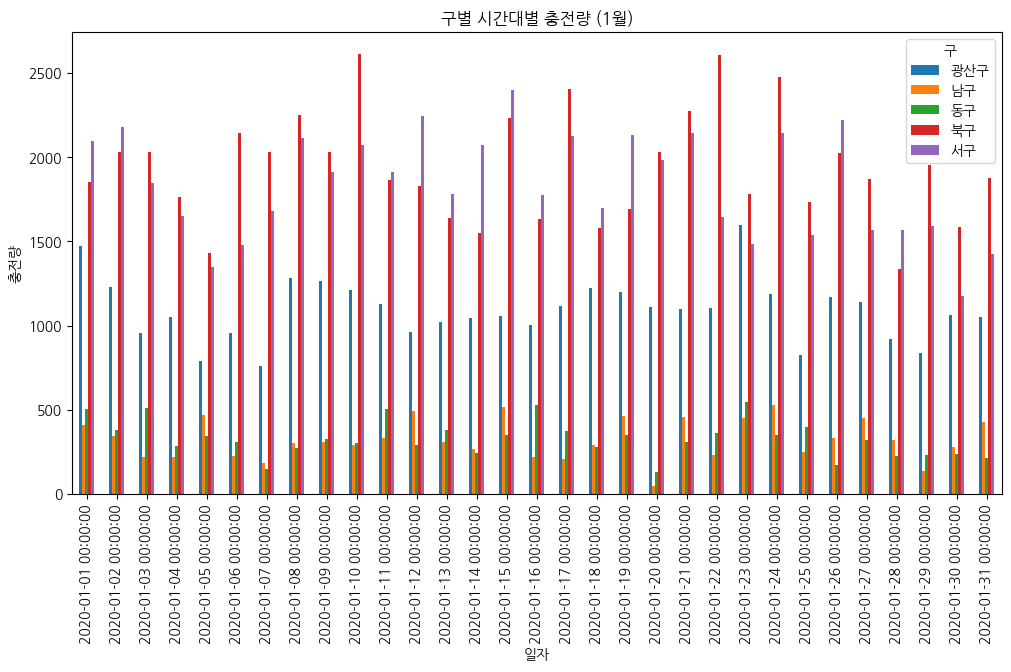

In [ ]:
# 1월 구별 일별 충전량
gu1_hourly_pivot = gu1_charge_df.pivot_table(values='충전량', index='충전종료일자', columns='구', aggfunc='sum')

gu1_hourly_pivot.plot(kind='bar', figsize=(12,6))
plt.xlabel('일자')
plt.ylabel('충전량')
plt.title('구별 시간대별 충전량 (1월)')
plt.show()
# 선그래프로

In [ ]:
# 일자별 총충전량
gwangju['충전종료일자'] = pd.to_datetime(gwangju['충전종료일자'])

# 일자별, 시간대별 충전량 계산
daily_hourly_charge = gwangju.groupby([gwangju['충전종료일자'].dt.date, gwangju['구']])['충전량'].sum()

# 일자 컬럼 추가
daily_hourly_charge_df = pd.DataFrame({'일자': [i[0] for i in daily_hourly_charge.index],
                                       '구': [i[1] for i in daily_hourly_charge.index],
                                       '충전량': daily_hourly_charge.values})

# 월별 컬럼 추가
daily_hourly_charge_df['월'] = daily_hourly_charge_df['일자'].apply(lambda x: x.month)

# 월별 컬럼에 일자별 충전량 매핑
monthly_charge = daily_hourly_charge_df.groupby(['월', '구'])['충전량'].sum().unstack()

monthly_charge
# 월별 구별 총충전량

구,광산구,남구,동구,북구,서구
월,,,,,
1,33858.748,10002.04,10188.62,60180.1700,57015.3900
2,27679.322,8859.74,8290.67,55596.2300,52196.1560
3,30470.560,8409.33,9245.30,48137.7700,47398.3240
4,33526.232,8769.49,9157.15,52862.1900,51840.7000
5,32933.314,9270.69,9233.28,50325.2000,56475.7700
6,30262.708,8676.86,9470.55,35360.0100,38701.4760
7,33434.054,8357.87,9611.50,71741.9300,50329.2820
8,36713.836,9453.40,11165.87,33874.4600,55512.3560
9,31952.030,8598.93,9993.77,50573.4400,45393.9430


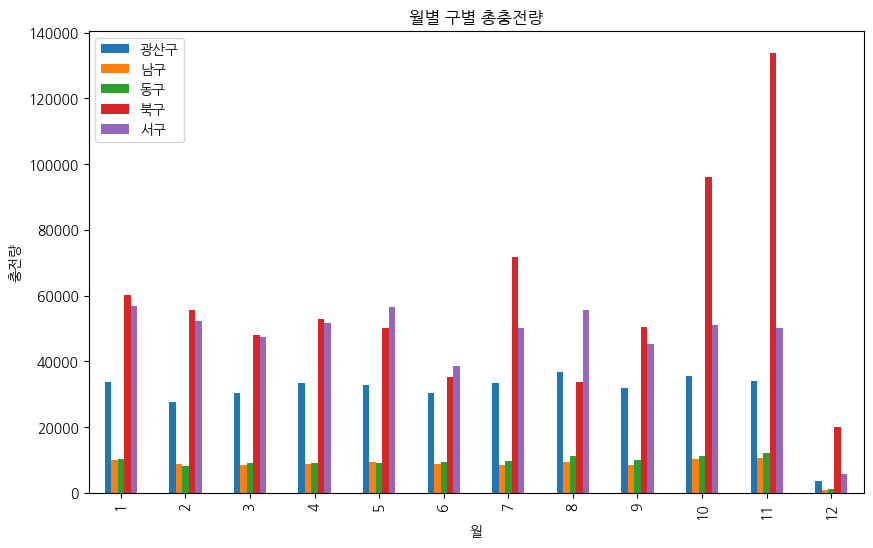

In [ ]:
monthly_charge.plot(kind='bar', figsize=(10, 6))
plt.title('월별 구별 총충전량')
plt.xlabel('월')
plt.ylabel('충전량')
plt.legend(loc='best')
plt.show()

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

subfig = make_subplots(
    rows=1, cols=2,
    column_widths=[10, 10],
    row_heights=[10],
    subplot_titles=("구별 총 충전량 비율", "구별 총 충전량"),
    specs=[[{"type": "pie"}, {"type": "bar"}]])

# 'gwangju' 데이터프레임에서 '구'별 '충전량' 합계를 계산합니다.
gwangju_gu = gwangju.groupby('구')['충전량'].sum().sort_values(ascending=False)

# 'gwangju_gu' 데이터프레임을 subfig에 추가합니다.
subfig.add_trace(
    go.Pie(labels=gwangju_gu.index, values=gwangju_gu.values, showlegend=True), 1, 1)
subfig.add_trace(
    go.Bar(x=gwangju_gu.index, y=gwangju_gu.values, showlegend=False), 1, 2)

subfig.update_layout(template="plotly_dark", title='구별 총 충전량')
subfig.show()

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

subfig = make_subplots(
    rows=1, cols=2,
    column_widths=[10, 10],
    row_heights=[10],
    subplot_titles=("구별 총 충전량 비율", "구별 총 충전량"),
    specs=[[{"type": "pie"}, {"type": "bar"}]])

# 'gwangju' 데이터프레임에서 '구'별 '충전량' 합계를 계산합니다.
gwangju_gu = gwangju.groupby('구')['충전량'].sum().sort_values(ascending=False)

# 'gwangju_gu' 데이터프레임을 subfig에 추가합니다.
subfig.add_trace(
    go.Pie(labels=gwangju_gu.index, values=gwangju_gu.values, showlegend=True), 1, 1)

bar_trace = go.Bar(x=gwangju_gu.index, y=gwangju_gu.values, showlegend=False,
                   marker=dict(color=['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A']))
subfig.add_trace(bar_trace, 1, 2)

subfig.update_layout(template="plotly_dark", title='구별 총 충전량')
subfig.show()

In [ ]:
mart = gwangju[gwangju['충전소명'].str.contains('마트|홈플러스')]
mart

,본부,사업소,충전소명,충전기,주소,충전기구분,충전용량,충전량,충전시간,충전분,충전종료일자,충전시작시각,충전종료시각,시,구,도로명주소
12,광주전남,광주전남직할,홈플러스 동광주점,급속01,"광주광역시 북구 동문대로 200 (두암동, 삼성홈플러스)",급속,50.0,8.36,0,22,2020-01-01,2020-01-01 21:21:00,2020-01-01 21:44:00,광주광역시,북구,"동문대로 200 (두암동, 삼성홈플러스)"
16,광주전남,광주전남직할,홈플러스 광주계림점,급속01,"광주광역시 동구 무등로 314 (계림동, 홈플러스 광주계림점)",급속,50.0,36.99,1,2,2020-01-01,2020-01-01 18:14:00,2020-01-01 19:17:00,광주광역시,동구,"무등로 314 (계림동, 홈플러스 광주계림점)"
20,환경부,환경부,롯데마트 상무점,급속01,"광주광역시 서구 시청로 40, 1층 진입후 우측",급속,NaN,15.66,0,24,2020-01-01,2020-01-01 18:27:00,2020-01-01 18:51:00,광주광역시,서구,"시청로 40, 1층 진입후 우측"
38,광주전남,광주전남직할,이마트 동광주점,급속01,"광주광역시 동구 중앙로 358 (계림동, 금호계림주상복합)",급속,50.0,13.99,0,40,2020-01-01,2020-01-01 20:18:00,2020-01-01 20:58:00,광주광역시,동구,"중앙로 358 (계림동, 금호계림주상복합)"
42,광주전남,광산,홈플러스 광주하남점,급속01,광주광역시 광산구 용아로 390 (하남동),급속,50.0,37.59,0,54,2020-01-01,2020-01-01 17:58:00,2020-01-01 18:52:00,광주광역시,광산구,용아로 390 (하남동)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57079,광주전남,광주전남직할,홈플러스 동광주점,급속01,"광주광역시 북구 동문대로 200 (두암동, 삼성홈플러스)",급속,50.0,62.55,2,0,2020-12-03,2020-12-03 15:28:00,2020-12-03 17:29,광주광역시,북구,"동문대로 200 (두암동, 삼성홈플러스)"
57080,광주전남,광주전남직할,이마트 동광주점,급속01,"광주광역시 동구 중앙로 358 (계림동, 금호계림주상복합)",급속,50.0,31.84,0,49,2020-12-03,2020-12-03 18:15:00,2020-12-03 19:04,광주광역시,동구,"중앙로 358 (계림동, 금호계림주상복합)"
57153,광주전남,광산,홈플러스 광주하남점,급속01,광주광역시 광산구 용아로 390 (하남동),급속,50.0,15.05,0,21,2020-12-03,2020-12-03 18:27:00,2020-12-03 18:49,광주광역시,광산구,용아로 390 (하남동)
57155,광주전남,광주전남직할,이마트 동광주점,급속01,"광주광역시 동구 중앙로 358 (계림동, 금호계림주상복합)",급속,50.0,25.26,3,0,2020-12-03,2020-12-03 14:58:00,2020-12-03 17:59,광주광역시,동구,"중앙로 358 (계림동, 금호계림주상복합)"


In [ ]:
mart_time_charge = mart.groupby([mart['충전시작시각'], mart['충전소명']])['충전량'].sum()
mart_time_charge

충전시작시각               충전소명      
2020-01-01 09:54:00  이마트 동광주점      39.05
2020-01-01 10:06:00  홈플러스 광주계림점     7.36
2020-01-01 10:49:00  홈플러스 동광주점     13.62
2020-01-01 11:22:00  홈플러스 광주계림점    14.90
2020-01-01 12:15:00  홈플러스 동광주점     39.46
                                   ...  
2020-12-03 15:28:00  홈플러스 동광주점     62.55
2020-12-03 18:15:00  이마트 동광주점      31.84
2020-12-03 18:27:00  홈플러스 광주하남점    15.05
2020-12-03 20:32:00  홈플러스 광주계림점    18.70
2020-12-03 22:15:00  홈플러스 광주계림점    18.21
Name: 충전량, Length: 3233, dtype: float64

In [ ]:
# 충전시간별 충전소명 충전량
mart_time_charge_df = pd.DataFrame({'충전시간': [i[0] for i in mart_time_charge.index],
                                       '충전소명': [i[1] for i in mart_time_charge.index],
                                       '충전량': mart_time_charge.values})
mart_time_charge_df

,충전시간,충전소명,충전량
0,2020-01-01 09:54:00,이마트 동광주점,39.05
1,2020-01-01 10:06:00,홈플러스 광주계림점,7.36
2,2020-01-01 10:49:00,홈플러스 동광주점,13.62
3,2020-01-01 11:22:00,홈플러스 광주계림점,14.90
4,2020-01-01 12:15:00,홈플러스 동광주점,39.46
...,...,...,...
3228,2020-12-03 15:28:00,홈플러스 동광주점,62.55
3229,2020-12-03 18:15:00,이마트 동광주점,31.84
3230,2020-12-03 18:27:00,홈플러스 광주하남점,15.05
3231,2020-12-03 20:32:00,홈플러스 광주계림점,18.70


In [ ]:
# mart_time_charge_df.to_csv('1월부터12월마트충전.csv',encoding='cp949')

In [ ]:
# 마트별 시간대별 충전량
mart_time_charge_df['hour'] = mart_time_charge_df['충전시간'].dt.hour
mart_hourly_charge = mart_time_charge_df.groupby(['충전소명', 'hour'])['충전량'].sum().reset_index()

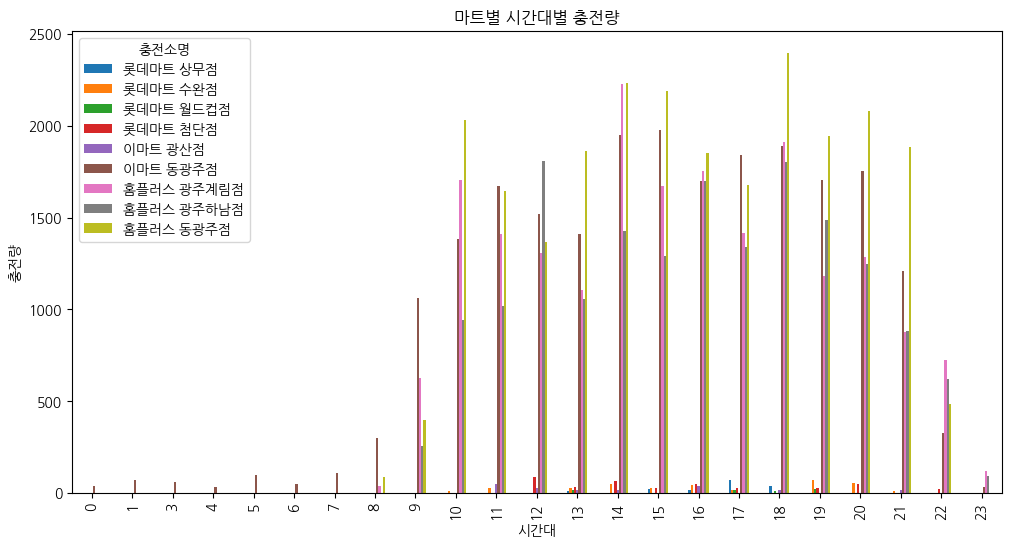

In [ ]:
mart_hourly_pivot = mart_hourly_charge.pivot_table(values='충전량', index='hour', columns='충전소명', aggfunc='sum')
mart_hourly_pivot.plot(kind='bar', figsize=(12,6))
plt.xlabel('시간대')
plt.ylabel('충전량')
plt.title('마트별 시간대별 충전량')
plt.show()

In [ ]:
mart_hourly_charge

,충전소명,hour,충전량
0,롯데마트 상무점,10,0.91
1,롯데마트 상무점,13,13.31
2,롯데마트 상무점,15,19.17
3,롯데마트 상무점,16,17.46
4,롯데마트 상무점,17,72.37
...,...,...,...
105,홈플러스 동광주점,18,2396.92
106,홈플러스 동광주점,19,1944.36
107,홈플러스 동광주점,20,2079.58
108,홈플러스 동광주점,21,1882.58


In [ ]:
mart_month_charge = mart.groupby([mart['충전종료일자'], mart['충전소명']])['충전량'].sum()
mart_month_charge

충전종료일자      충전소명      
2020-01-01  롯데마트 상무점       15.66
            이마트 동광주점       71.39
            홈플러스 광주계림점     96.66
            홈플러스 광주하남점    124.10
            홈플러스 동광주점     157.60
                           ...  
2020-12-02  홈플러스 동광주점      23.80
2020-12-03  이마트 동광주점       57.10
            홈플러스 광주계림점     84.85
            홈플러스 광주하남점     26.72
            홈플러스 동광주점      62.55
Name: 충전량, Length: 1260, dtype: float64

In [ ]:
# 충전시간별 충전소명 충전량
mart_month_charge_df = pd.DataFrame({'충전날짜': [i[0] for i in mart_month_charge.index],
                                       '충전소명': [i[1] for i in mart_month_charge.index],
                                       '충전량': mart_month_charge.values})
mart_month_charge_df

,충전날짜,충전소명,충전량
0,2020-01-01,롯데마트 상무점,15.66
1,2020-01-01,이마트 동광주점,71.39
2,2020-01-01,홈플러스 광주계림점,96.66
3,2020-01-01,홈플러스 광주하남점,124.10
4,2020-01-01,홈플러스 동광주점,157.60
...,...,...,...
1255,2020-12-02,홈플러스 동광주점,23.80
1256,2020-12-03,이마트 동광주점,57.10
1257,2020-12-03,홈플러스 광주계림점,84.85
1258,2020-12-03,홈플러스 광주하남점,26.72


In [ ]:
# mart_month_charge.to_csv('마트별충전량.csv', encoding='cp949')

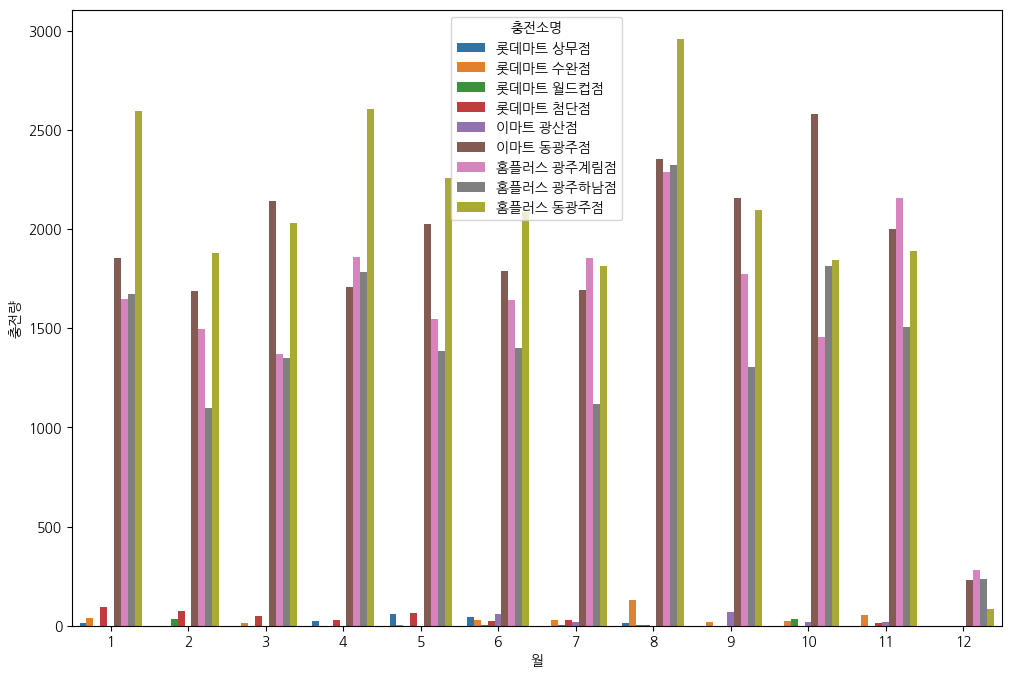

In [ ]:
# 마트별 월충전량
mart_month_charge_df['월'] = pd.to_datetime(mart_month_charge_df['충전날짜']).dt.month
mart_monthly_charge = mart_month_charge_df.groupby(['충전소명', '월'])['충전량'].sum().reset_index()

# 시각화
plt.figure(figsize=(12, 8))
sns.barplot(data=mart_monthly_charge, x='월', y='충전량', hue='충전소명')
plt.show()

In [ ]:
mart_monthly_charge

,충전소명,월,충전량
0,롯데마트 상무점,1,15.66
1,롯데마트 상무점,4,26.11
2,롯데마트 상무점,5,60.08
3,롯데마트 상무점,6,43.22
4,롯데마트 상무점,7,0.91
...,...,...,...
77,홈플러스 동광주점,8,2957.43
78,홈플러스 동광주점,9,2095.01
79,홈플러스 동광주점,10,1844.05
80,홈플러스 동광주점,11,1887.62


In [ ]:
mart['충전소명'].value_counts()

홈플러스 동광주점     958
홈플러스 광주계림점    831
이마트 동광주점      778
홈플러스 광주하남점    589
롯데마트 수완점       25
롯데마트 첨단점       20
이마트 광산점        12
롯데마트 상무점       11
롯데마트 월드컵점       9
Name: 충전소명, dtype: int64